In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [2]:
%matplotlib inline

# 1d case

In [3]:
# How many? -1 == all
sizes = [1000, 2000, 4000, 8000, 16000]

fs_ID_100 = []
fs_ID_200 = []
fs_ID_400 = []
fs_ID_800 = []
fs_ID_1600 = []
fs_ID_3200 = []

fs_IS_100 = []
fs_IS_200 = []
fs_IS_400 = []
fs_IS_800 = []
fs_IS_1600 = []
fs_IS_3200 = []

fs_ISCE_100 = []
fs_ISCE_200 = []
fs_ISCE_400 = []
fs_ISCE_800 = []
fs_ISCE_1600 = []
fs_ISCE_3200 = []

for n in range(51):
    fs_IS_100.append(h5py.File(f'IS/StillShock/Shear/res_scaling/1000/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_100.append(h5py.File(f'ISCE/StillShock/Shear/res_scaling/1000/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ID_100.append(h5py.File(f'IS/StillShock/Ideal/res_scaling/1000/data_serial_TIx_{n}.hdf5', 'r'))
    
    fs_IS_200.append(h5py.File(f'IS/StillShock/Shear/res_scaling/2000/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_200.append(h5py.File(f'ISCE/StillShock/Shear/res_scaling/2000/data_serial_TIx_{n}.hdf5', 'r'))  
    fs_ID_200.append(h5py.File(f'IS/StillShock/Ideal/res_scaling/2000/data_serial_TIx_{n}.hdf5', 'r'))

    fs_IS_400.append(h5py.File(f'IS/StillShock/Shear/res_scaling/4000/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_400.append(h5py.File(f'ISCE/StillShock/Shear/res_scaling/4000/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ID_400.append(h5py.File(f'IS/StillShock/Ideal/res_scaling/4000/data_serial_TIx_{n}.hdf5', 'r'))

    fs_IS_800.append(h5py.File(f'IS/StillShock/Shear/res_scaling/8000/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_800.append(h5py.File(f'ISCE/StillShock/Shear/res_scaling/8000/data_serial_TIx_{n}.hdf5', 'r'))    
    fs_ID_800.append(h5py.File(f'IS/StillShock/Ideal/res_scaling/8000/data_serial_TIx_{n}.hdf5', 'r'))

    fs_IS_1600.append(h5py.File(f'IS/StillShock/Shear/res_scaling/16000/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_1600.append(h5py.File(f'ISCE/StillShock/Shear/res_scaling/16000/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ID_1600.append(h5py.File(f'IS/StillShock/Ideal/res_scaling/16000/data_serial_TIx_{n}.hdf5', 'r'))
  
fss_IS = [fs_IS_100, fs_IS_200, fs_IS_400, fs_IS_800, fs_IS_1600]

fss_ISCE = [fs_ISCE_100, fs_ISCE_200, fs_ISCE_400, fs_ISCE_800, fs_ISCE_1600]

fss_ID = [fs_ID_100, fs_ID_200, fs_ID_400, fs_ID_800, fs_ID_1600]

fss = [fss_IS, fss_ISCE, fss_ID]

In [4]:
fssIS, fssISCE = fss[0], fss[1]
for fsIS, fsISCE in zip(fssIS, fssISCE):
    print(fsIS[0]['Primitive/pi11'].shape)
    print(fsISCE[0]['Primitive/p'].shape)

(1000,)
(1000,)
(2000,)
(2000,)
(4000,)
(4000,)
(8000,)
(8000,)
(16000,)
(16000,)


In [5]:
# eta = fs_IS[0]['Optional'].attrs['eta'][0]
# tau_pi = fs_IS[0]['Optional'].attrs['tau_pi'][0]
# print(f"Dissipation strength {eta}, "
#       f"relaxation time {tau_pi}, "
#       f"timestep {fs_IS[0]['Domain'].attrs['dt'][0]}")

In [6]:
# eta = fs_ISCE[0]['Optional'].attrs['eta'][0]
# tau_pi = fs_ISCE[0]['Optional'].attrs['tau_pi'][0]
# print(f"Dissipation strength {eta}, "
#       f"relaxation time {tau_pi}, "
#       f"timestep {fs_ISCE[0]['Domain'].attrs['dt'][0]}")

In [7]:
print("IS: \n")
for fs in fss[0]:
    zeta = fs[0]['Optional'].attrs['zeta'][0]
    tau_Pi = fs[0]['Optional'].attrs['tau_Pi'][0]
    print(f"Dissipation strength {zeta}, "
          f"relaxation time {tau_Pi}, "
          f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

print("ISCE: \n")
for fs in fss[1]:
    zeta = fs[0]['Optional'].attrs['zeta'][0]
    tau_Pi = fs[0]['Optional'].attrs['tau_Pi'][0]
    print(f"Dissipation strength {zeta}, "
          f"relaxation time {tau_Pi}, "
          f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

IS: 

Dissipation strength 1e-15, relaxation time 0.1, timestep 0.0002
Dissipation strength 1e-15, relaxation time 0.1, timestep 0.0001
Dissipation strength 1e-15, relaxation time 0.1, timestep 5e-05
Dissipation strength 1e-15, relaxation time 0.1, timestep 2.5e-05
Dissipation strength 1e-15, relaxation time 0.1, timestep 1.25e-05
ISCE: 

Dissipation strength 1e-15, relaxation time 0.1, timestep 0.0002
Dissipation strength 1e-15, relaxation time 0.1, timestep 0.0001
Dissipation strength 1e-15, relaxation time 0.1, timestep 5e-05
Dissipation strength 1e-15, relaxation time 0.1, timestep 2.5e-05
Dissipation strength 1e-15, relaxation time 0.1, timestep 1.25e-05


In [8]:
print("IS: \n")
for fs in fss[0]:
    eta = fs[0]['Optional'].attrs['eta'][0]
    tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
    print(f"Dissipation strength {eta}, "
          f"relaxation time {tau_pi}, "
          f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

print("ISCE: \n")
for fs in fss[1]:
    eta = fs[0]['Optional'].attrs['eta'][0]
    tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]
    print(f"Dissipation strength {eta}, "
          f"relaxation time {tau_pi}, "
          f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

IS: 

Dissipation strength 0.05, relaxation time 0.1, timestep 0.0002
Dissipation strength 0.05, relaxation time 0.1, timestep 0.0001
Dissipation strength 0.05, relaxation time 0.1, timestep 5e-05
Dissipation strength 0.05, relaxation time 0.1, timestep 2.5e-05
Dissipation strength 0.05, relaxation time 0.1, timestep 1.25e-05
ISCE: 

Dissipation strength 0.001, relaxation time 0.1, timestep 0.0002
Dissipation strength 0.001, relaxation time 0.1, timestep 0.0001
Dissipation strength 0.001, relaxation time 0.1, timestep 5e-05
Dissipation strength 0.001, relaxation time 0.1, timestep 2.5e-05
Dissipation strength 0.001, relaxation time 0.1, timestep 1.25e-05


In [9]:
for fs in fss[0]:
    print(fs[-1].attrs['t'])
for fs in fss[1]:
    print(fs[-1].attrs['t'])

[0.8]
[0.8]
[0.8]
[0.8]
[0.8]
[0.8]
[0.8]
[0.8]
[0.8]
[0.8]


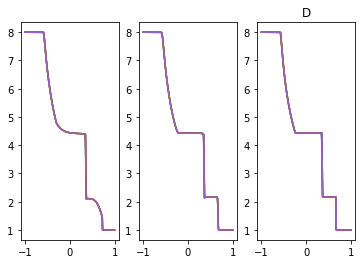

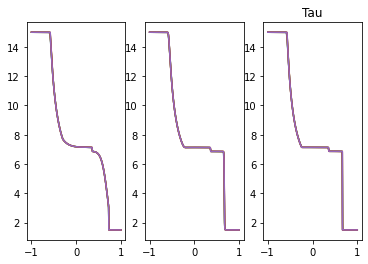

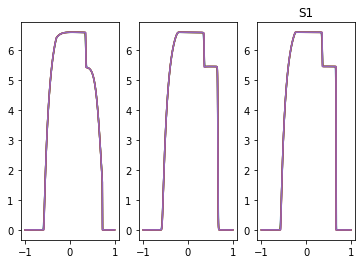

In [10]:
#nslice=fs_IS[0]['Domain'].attrs['ny'][0]//2
  
for quant in['D','Tau','S1']:
    fig, axes = plt.subplots(1,3)
    for axis, fssISISCE in zip(axes, fss):
        for fs in fssISISCE:
            axis.plot(fs[-1]['Domain/x'], fs[-1]['Conserved/'+quant][:])#,label=rf"$t=${f.attrs['t'][0]:.2e}")
            plt.title(quant)
        #plt.legend()
    plt.savefig("ComparePlots/Cons_"+quant+".pdf")
    plt.show()


In [11]:
# for quant in['D','Tau','S1']:
#     plt.figure()
#     for n in range(len(fs_IS)):
#         #plt.plot(f['Domain/x'], f['Conserved/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.plot(fs_IS[n]['Domain/x'], (fs_IS[n]['Conserved/'+quant][:] - fs_ISCE[n]['Conserved/'+quant][:])/fs_IS[n]['Conserved/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#         plt.title(quant)
#     plt.legend()
#     plt.savefig("ComparePlots/ConsRelDiff_"+quant+".pdf")
#     plt.show()

INITIAL DATA


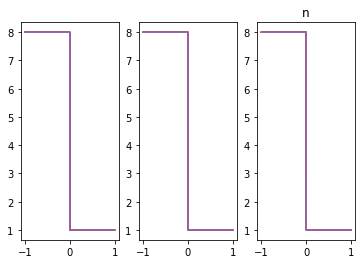

<Figure size 432x288 with 0 Axes>

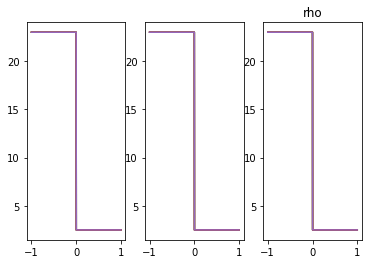

<Figure size 432x288 with 0 Axes>

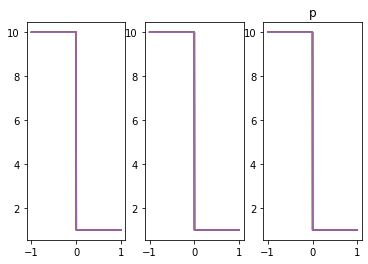

<Figure size 432x288 with 0 Axes>

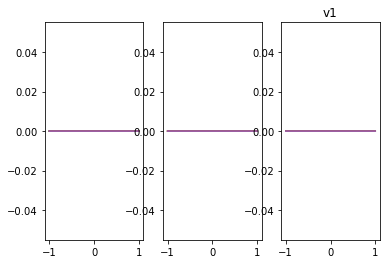

<Figure size 432x288 with 0 Axes>

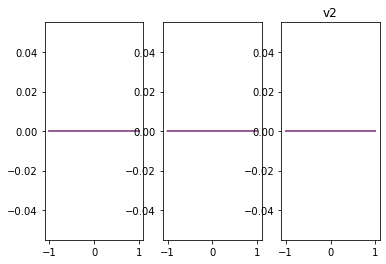

<Figure size 432x288 with 0 Axes>

In [12]:
print("INITIAL DATA")
for quant in['n','rho','p','v1','v2']:
    fig, axes = plt.subplots(1,3)
    for axis, fssISISCE in zip(axes, fss):
        for fs in fssISISCE:
            axis.plot(fs[0]['Domain/x'], fs[0]['Primitive/'+quant][:])#=rf"$t=${f.attrs['t'][0]:.2e}")
            plt.title(quant)
    #plt.legend()
    plt.show()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


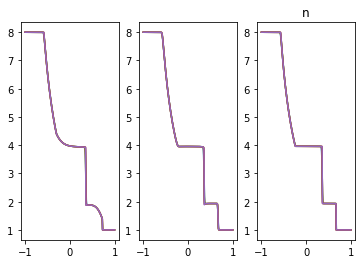

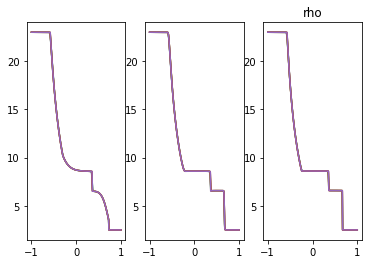

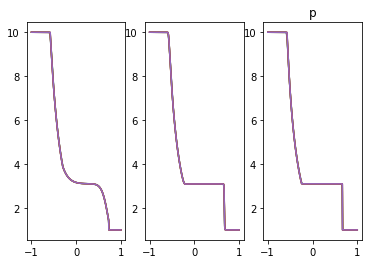

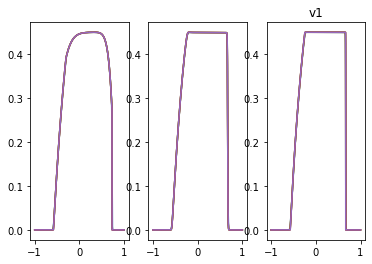

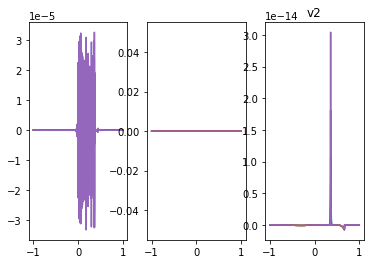

In [13]:
for quant in['n','rho','p','v1','v2']:
    fig, axes = plt.subplots(1,3)
    for axis, fssISISCE in zip(axes, fss):
        for fs in fssISISCE:
            axis.plot(fs[-1]['Domain/x'], fs[-1]['Primitive/'+quant][:])
        plt.title(quant)
    #plt.legend()
    
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")


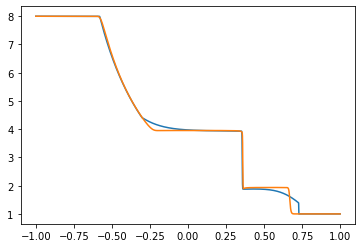

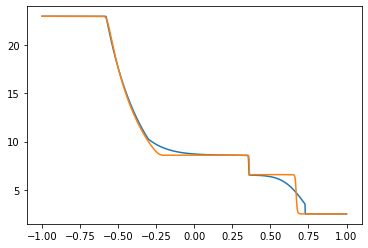

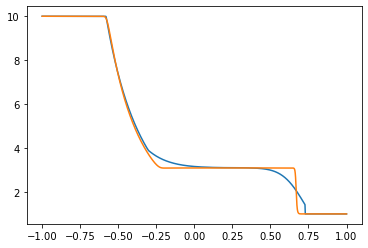

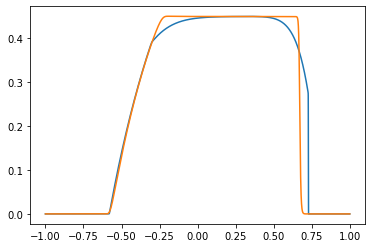

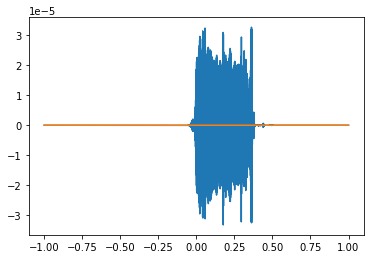

In [14]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    plt.plot(fss[0][-1][-1]['Domain/x'], fss[0][-1][-1]['Primitive/'+quant][:])
    plt.plot(fss[1][-1][-1]['Domain/x'], fss[1][-1][-1]['Primitive/'+quant][:])


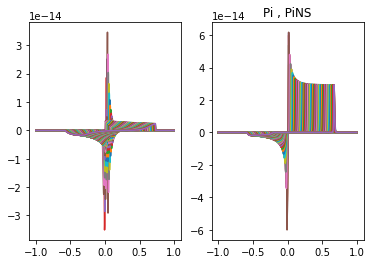

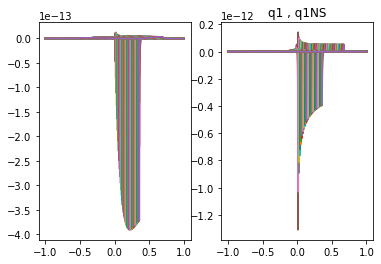

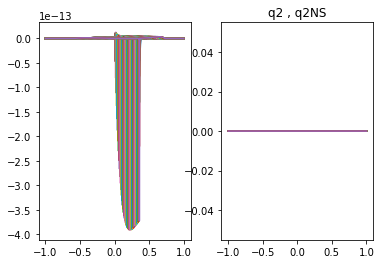

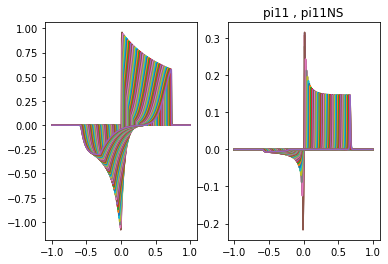

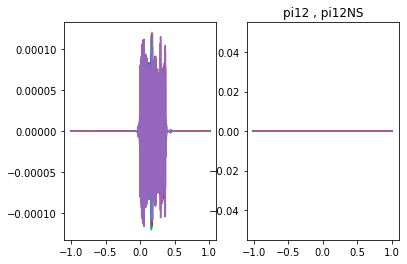

In [15]:
for quant in ['Pi','q1', 'q2', 'pi11', 'pi12']:
    fig, axes = plt.subplots(1,2)
    axis = axes[0]
    for fsIS in fss_IS:
        for fIS in fsIS:
            axis.plot(fIS['Domain/x'], fIS['Primitive/'+quant][:],label='IS')#=rf"$t=${f.attrs['t'][0]:.2e}")
    axis = axes[1]
    for fsISCE in fss_ISCE:
        for fISCE in fsISCE:
            axis.plot(fISCE['Domain/x'], fISCE['Auxiliary/'+quant+'NS'][:],label='ISCE')#=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' , '+quant+'NS')
    #plt.legend()
    plt.savefig("ComparePlots/Prims_"+quant+".pdf")

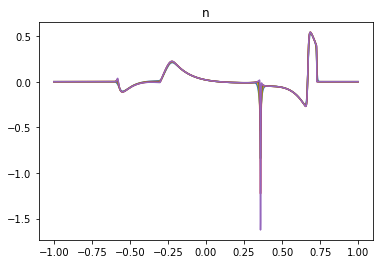

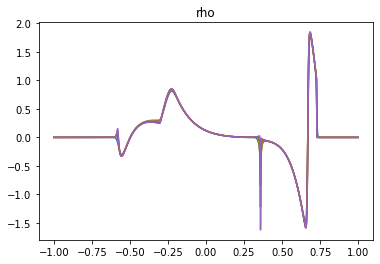

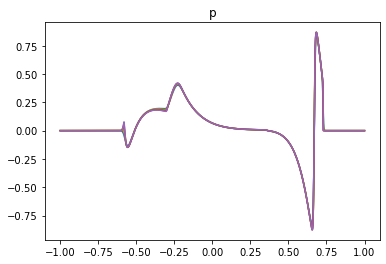

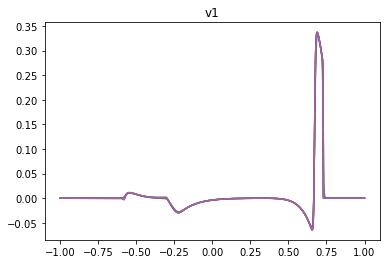

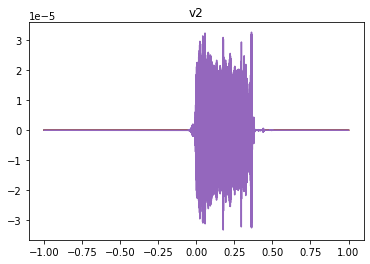

In [16]:
lims = [0,1]
plt.figure()
for quant in['n','rho','p','v1','v2']:
    for fsIS, fsISCE in zip(fss_IS, fss_ISCE):
        nsl = int(lims[0]*fsIS[0]['Primitive/pi11'].shape[0])
        nsu = int(lims[1]*fsIS[0]['Primitive/pi11'].shape[0])
        plt.plot(fsIS[0]['Domain/x'][nsl:nsu], fsIS[-1]['Primitive/'+quant][nsl:nsu] - fsISCE[-1]['Primitive/'+quant][nsl:nsu])
        #plt.plot(fsIS[0]['Domain/x'], fsIS[1]['Primitive/'+quant][:] - fsISCE[1]['Primitive/'+quant][:])
        plt.title(quant)
    plt.savefig("ComparePlots/DiffAcrossDomain_"+quant+".pdf")
    plt.show()
    

1.0261169088312988e-06 0.10897558574832442


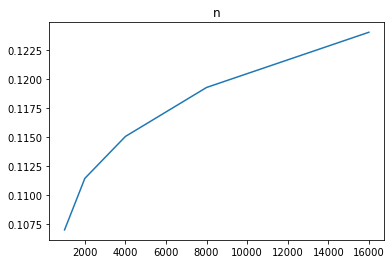

7.018565570448433e-07 0.41707207063906104


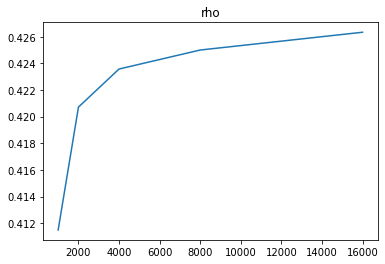

2.0889967593923427e-07 0.21302928438897276


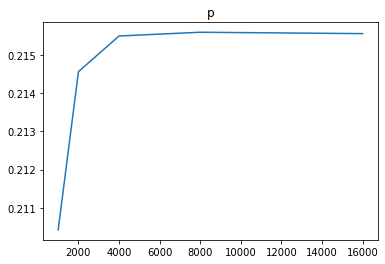

6.467715919403531e-08 0.05169031217789453


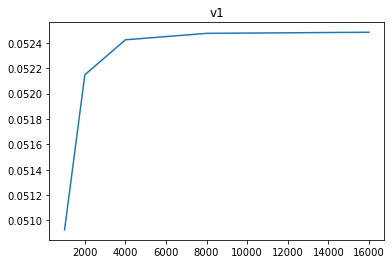

4.2635724414337227e-10 -1.348606372008108e-06


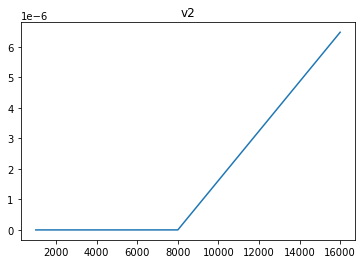

In [17]:
diffs = []
plt.figure()
for quant in['n','rho','p','v1','v2']:
    for fsIS, fsISCE, size in zip(fss_IS, fss_ISCE, sizes):
        nslice_lower = int(lims[0]*fsIS[0]['Primitive/pi11'].shape[0])
        nslice_upper = int(lims[1]*fsIS[0]['Primitive/pi11'].shape[0])
#         diffs.append(np.sum(np.linalg.norm(abs(fsIS[-1]['Primitive/'+quant][nslice_lower:nslice_upper] \
#                                    - fsISCE[-1]['Primitive/'+quant][nslice_lower:nslice_upper]),1)/size))
        diffs.append(np.sum(np.linalg.norm(abs(fsIS[-1]['Primitive/'+quant][nslice_lower:nslice_upper] \
                                   - fsISCE[-1]['Primitive/'+quant][nslice_lower:nslice_upper]),2)/np.sqrt(size)))
#         diffs.append(np.sum(np.linalg.norm(abs(fsIS[-1]['Primitive/'+quant][nslice_lower:nslice_upper] \
#                                    - fsISCE[-1]['Primitive/'+quant][nslice_lower:nslice_upper]),np.inf)))
    plt.plot(sizes, diffs)
    slope, intercept = np.polyfit(sizes, diffs, 1)
    print(slope, intercept)
    #plt.plot(sizes, intercept + slope*np.array(sizes))
    #plt.plot(sizes, diffs)
    plt.title(quant)
    plt.savefig("ComparePlots/DiffScaling_"+quant+".pdf")
    plt.show()
    diffs.clear()

# for quant in['n','rho','p','v1','v2']:
#     for fsIS, fsISCE, size in zip(fss_IS, fss_ISCE, sizes):
#         print(size, np.sum(np.abs(fsIS[-1]['Primitive/'+quant][:] - fsISCE[-1]['Primitive/'+quant][:])))
#         plt.plot(size, np.sum(np.abs(fsIS[-1]['Primitive/'+quant][:] - fsISCE[-1]['Primitive/'+quant][:])))
#     plt.title(quant)
#     plt.show()
#     #plt.legend()
#     plt.savefig("ComparePlots/Prims_"+quant+".pdf")

In [18]:
for quant in['n','rho','p','v1','v2']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Primitive/'+quant][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/PrimsRelDiff_"+quant+".pdf")
    plt.show()
    

NameError: name 'fs_IS' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
# for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
#     plt.figure()
#     #for f in fs:
#     fIS = fs_IS[-1]
#     fISCE = fs_ISCE[-1]
#     plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:])/fIS['Primitive/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
#     plt.title(quant+' - '+quant+'NS / '+quant)
#     plt.legend()
#     plt.savefig("ComparePlots/PrimsDiff_"+quant+".pdf")
#     plt.show()
    

In [ ]:
for quant in['Pi','q1', 'q2', 'pi11', 'pi12']:
    plt.figure()
    #for f in fs:
    fIS = fs_IS[-1]
    fISCE = fs_ISCE[-1]
    plt.plot(fIS['Domain/x'], (fIS['Primitive/'+quant][:] - fISCE['Auxiliary/'+quant+'NS'][:]),label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant+' - '+quant+'NS')
    plt.legend()
    plt.savefig("ComparePlots/PrimsAbsDiff_"+quant+".pdf")
    plt.show()
    

In [ ]:
for quant in ['T','a1']:
    plt.figure()
    for f in fs_IS:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    for f in fs_ISCE:
        #plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:,nslice,nslice],label=rf"$t=${f.attrs['t'][0]:.2e}")
        plt.plot(f['Domain/x'], f['Auxiliary/'+quant][:],label=rf"$t=${f.attrs['t'][0]:.2e}")
    plt.title(quant)
    plt.legend()
    plt.savefig("ComparePlots/Aux_"+quant+".pdf")
    plt.show()
